Installing the mysql connector to connect to database

In [4]:
pip install mysql-connector-python

     |████████████████████████████████| 352 kB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Importing the required modules and libraries

In [4]:
import mysql.connector
import pandas as pd

Connecting to the database

In [5]:
def create_database():
    #connecting to the default database
    conn = mysql.connector.connect(
        host = "127.0.0.1",
        user = "root",
        password = "ShikharMac@8"
    )
    conn.autocommit = True
    curr = conn.cursor()
    
    #create database
    curr.execute("DROP DATABASE IF EXISTS netflix")
    curr.execute("CREATE DATABASE netflix")
    
    #close connection
    conn.close()
    
    conn = mysql.connector.connect(
        host = "127.0.0.1",
        database = "netflix",
        user = "root",
        password = "ShikharMac@8"
    )
    curr = conn.cursor()
    
    return curr, conn
    

In [309]:
def drop_tables(curr, conn):
    for query in drop_tables_queries:
        curr.execute(query)
        conn.commit()

In [310]:
def create_tables(curr, conn):
    for query in create_tables_queries:
        curr.execute(query)
        conn.commit()

Reading the csv datas into the dataframes through pandas library

In [76]:
RawCredits = pd.read_csv("/Users/shikharyadav/Desktop/Semester 2 - Spring 2023/Portfolio Projects/Netflix - Data Modeling & Exploration/raw_credits.csv")

In [77]:
RawTitles = pd.read_csv("/Users/shikharyadav/Desktop/Semester 2 - Spring 2023/Portfolio Projects/Netflix - Data Modeling & Exploration/raw_titles.csv")

In [46]:
RawCredits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [47]:
RawTitles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


Performing data cleaning

In [48]:
#removing the square brackets from genres and production_countries columns
rem_chars = "\]|\'|\[|\."
RawTitles['genres'] = RawTitles['genres'].str.replace(rem_chars, "", regex = True)
RawTitles['production_countries'] = RawTitles['production_countries'].str.replace(rem_chars, "", regex = True)

RawTitles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0


In [49]:
#removing rows where at least one element is missing
RawCredits = RawCredits.dropna()

In [50]:
#removing duplicates in the rawcredits dataframe
RawCredits.drop_duplicates(subset = 'person_id', keep = False, inplace = True)
#RawCredits.drop_duplicates(subset = 'id', keep = False, inplace = True)


In [57]:
#having multiple values in genres is not helpful in model building so keeping just the first values in genres
RawTitles['genres'] = RawTitles['genres'].str.split(',').str[0]

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,crime,US,NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy,GB,NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0


In [59]:
#renaming Genres to Genre
RawTitles = RawTitles.rename(columns = {'genres':'Genre'})

In [60]:
RawTitles.head()

,id,title,type,release_year,age_certification,runtime,Genre,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,crime,US,NaN,tt0075314,8.3,795222.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy,GB,NaN,tt0071853,8.2,530877.0
3,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0
4,tm190788,The Exorcist,MOVIE,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0


In [11]:
#storing the returnable objects of create_database function
curr, conn = create_database()

Creating the tables in the database

In [64]:
#curr.execute('DROP TABLE rawtitles')

rawtitles_table_create = ("""CREATE TABLE IF NOT EXISTS rawtitles(
id VARCHAR (255) PRIMARY KEY,
title VARCHAR(500),
type VARCHAR(255),
release_year VARCHAR(4),
age_certification VARCHAR(50),
runtime INT,
genre VARCHAR(500),
production_countries VARCHAR(500),
seasons INT,
imdb_id VARCHAR(255),
imdb_score FLOAT,
imdb_votes INT)
""")

curr.execute(rawtitles_table_create)
conn.commit()



In [63]:
#curr.execute('DROP TABLE rawcredits')

rawcredits_table_create = ("""CREATE TABLE IF NOT EXISTS rawcredits(
person_id VARCHAR(255) PRIMARY KEY,
id VARCHAR(255),
name VARCHAR(500),
fic_character VARCHAR(500),
role VARCHAR(500))""")

curr.execute(rawcredits_table_create)
conn.commit()


Inserting the data into the tables

In [65]:
rawtitles_insert = ("""INSERT INTO rawtitles(
id,
title,
type,
release_year,
age_certification,
runtime,
genre,
production_countries,
seasons,
imdb_id,
imdb_score,
imdb_votes)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)""")

In [66]:
for i, row in RawTitles.iterrows():
    #print(list(row))
    curr.execute(rawtitles_insert, list(row))

conn.commit()

In [67]:
rawcredits_insert = ("""INSERT INTO rawcredits(
person_id,
id,
name,
fic_character,
role)
VALUES(%s, %s, %s, %s, %s)""")

In [68]:
for i, row in RawCredits.iterrows():
    curr.execute(rawcredits_insert, list(row))
    
conn.commit()

Loading the tables into the dataframes after applying joins and segrating data in MySQL

In [79]:
NetflixMovies = pd.read_csv("/Users/shikharyadav/Desktop/Semester 2 - Spring 2023/Portfolio Projects/Netflix - Data Modeling & Exploration/NetflixMovies.csv")
NetflixShows = pd.read_csv("/Users/shikharyadav/Desktop/Semester 2 - Spring 2023/Portfolio Projects/Netflix - Data Modeling & Exploration/NetflixShows.csv")

Doing Exploratory Data Analysis

In [70]:
NetflixMovies.head()

,Title,Actor Name,Role,Released Year,Age Certification,Runtime,Genre,Production Countries,IMDB Score,Number of Votes
0,C/o Kancharapalem,Praveena Paruchuri,ACTOR,2018,PG,152,drama,IN,9.0,6562.0
1,Chhota Bheem & Krishna in Mayanagari,Krishna,ACTOR,2011,G,66,animation,IN,9.0,5.0
2,David Attenborough: A Life on Our Planet,Max Hughes,ACTOR,2020,PG,83,documentation,GB,9.0,31180.0
3,C/o Kancharapalem,Kishore Kumar Polimera,ACTOR,2018,PG,152,drama,IN,9.0,6562.0
4,C/o Kancharapalem,Karthik Rathnam,ACTOR,2018,PG,152,drama,IN,9.0,6562.0


In [71]:
NetflixShows.head()

,Title,Actor Name,Role,Released Year,Age Certification,Runtime,Genre,Production Countries,Seasons Broadcasted,IMDB Score,Number of Votes
0,Breaking Bad,Anna Gunn,ACTOR,2008,TV-MA,48,drama,US,5,9.5,1727694.0
1,Breaking Bad,Betsy Brandt,ACTOR,2008,TV-MA,48,drama,US,5,9.5,1727694.0
2,Avatar: The Last Airbender,Jessie Flower,ACTOR,2005,TV-Y7,24,scifi,US,3,9.3,297336.0
3,Avatar: The Last Airbender,Zach Tyler,ACTOR,2005,TV-Y7,24,scifi,US,3,9.3,297336.0
4,Avatar: The Last Airbender,Cricket Leigh,ACTOR,2005,TV-Y7,24,scifi,US,3,9.3,297336.0


In [72]:
pd.unique(NetflixMovies['Age Certification'])

array(['PG', 'G', nan, 'PG-13', 'R', 'NC-17'], dtype=object)

In [74]:
pd.unique(NetflixMovies['Genre'])

array(['drama', 'animation', 'documentation', 'comedy', 'scifi',
       'romance', 'music', 'western', 'action', 'crime', 'thriller',
       'fantasy', 'horror', 'war', 'family', 'sport', 'history', nan],
      dtype=object)

In [75]:
#finding out the unique values in the Genre column
pd.unique(NetflixShows['Genre'])

array(['drama', 'scifi', 'comedy', 'documentation', 'history', 'crime',
       'western', 'action', 'reality', 'sport', 'war', 'animation',
       'romance', 'thriller', 'fantasy', 'family', nan, 'horror', 'music'],
      dtype=object)

Pattern Recognition using Correlation

In [373]:
#installing dython library to find the correlation of categorical variables
!pip install dython

     |████████████████████████████████| 243 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 19.8 MB 28.9 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 152.7 MB/s eta 0:00:01
     |████████████████████████████████| 35.2 MB 48.0 MB/s eta 0:00:011
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
   

In [1]:
from dython.nominal import associations

In [2]:
from dython.nominal import identify_nominal_columns

In [27]:
#finding out the categorical variables using dython library
categorical_features_movies = identify_nominal_columns(NetflixMovies)
categorical_features_movies

['Title',
 'Actor Name',
 'Role',
 'Age Certification',
 'Genre',
 'Production Countries']

In [37]:
#dropping the unnecessary columns
NetflixMovies.drop(NetflixMovies.columns[[0,1,2]], axis = 1, inplace = True)
NetflixShows.drop(NetflixShows.columns[[0,1,2]], axis = 1, inplace = True)


Generating Correlation Matrix and Heat-Map

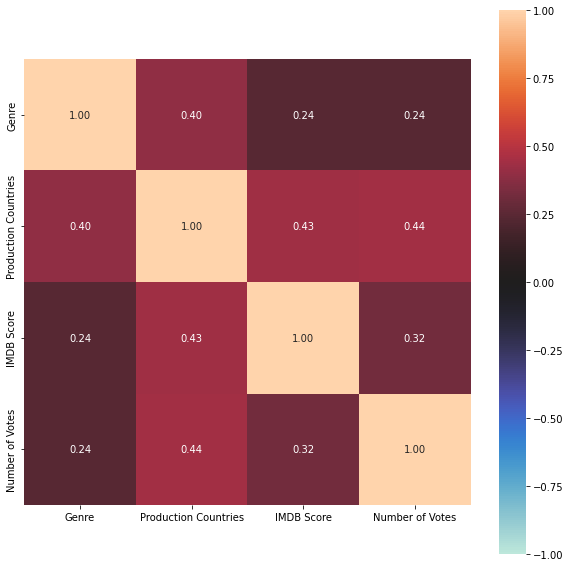

/var/folders/c6/l07hm63n1bl3v3b51p2g2cdw0000gn/T/ipykernel_28053/1107304657.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr_movies.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',


,Genre,Production Countries,IMDB Score,Number of Votes
Genre,1.00,0.40,0.24,0.24
Production Countries,0.40,1.00,0.43,0.44
IMDB Score,0.24,0.43,1.00,0.32
Number of Votes,0.24,0.44,0.32,1.00


In [38]:
# using associations function of dython library which uses Pearson's R for continous-continous coses, 
# Correlation Ration for categorical-continous cases, Cramer's V or Theil's U for categorical-categorical cases

correlation_movies = associations(NetflixMovies, figsize = (10,10))
df_corr_movies=correlation_movies['corr']
df_corr_movies.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',
                                                                                             axis=None).set_precision(2)

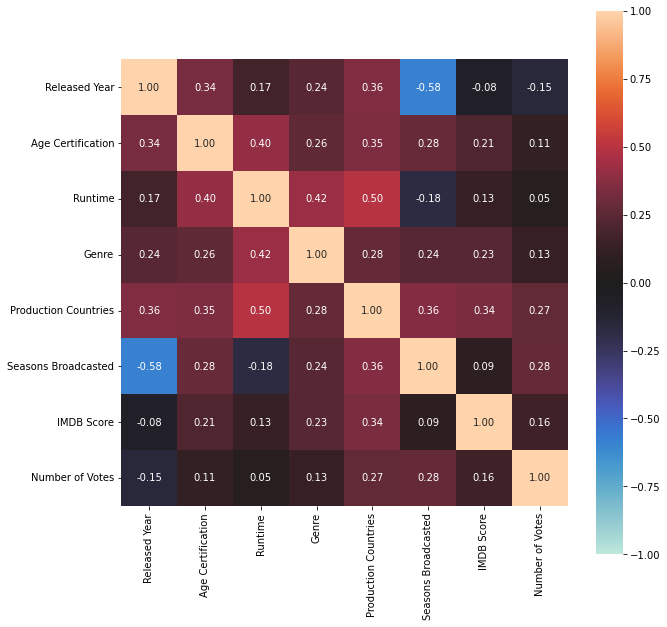

/var/folders/c6/l07hm63n1bl3v3b51p2g2cdw0000gn/T/ipykernel_28053/1159711282.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_corr_Shows.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',


,Released Year,Age Certification,Runtime,Genre,Production Countries,Seasons Broadcasted,IMDB Score,Number of Votes
Released Year,1.00,0.34,0.17,0.24,0.36,-0.58,-0.08,-0.15
Age Certification,0.34,1.00,0.40,0.26,0.35,0.28,0.21,0.11
Runtime,0.17,0.40,1.00,0.42,0.50,-0.18,0.13,0.05
Genre,0.24,0.26,0.42,1.00,0.28,0.24,0.23,0.13
Production Countries,0.36,0.35,0.50,0.28,1.00,0.36,0.34,0.27
Seasons Broadcasted,-0.58,0.28,-0.18,0.24,0.36,1.00,0.09,0.28
IMDB Score,-0.08,0.21,0.13,0.23,0.34,0.09,1.00,0.16
Number of Votes,-0.15,0.11,0.05,0.13,0.27,0.28,0.16,1.00


In [40]:
correlation_shows = associations(NetflixShows, figsize = (10,10))
df_corr_Shows=correlation_shows['corr']
df_corr_Shows.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm',
                                                                                             axis=None).set_precision(2)

Conclusion - As evident from the correlation matrices above, there is no correlation among the variables so it's not ideal to build a linear regression or any other machine learning model to predict any target variable in the data.